<a href="https://colab.research.google.com/github/mmaithani/data-science/blob/main/PyTorch_ALL_loss_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch loss functions


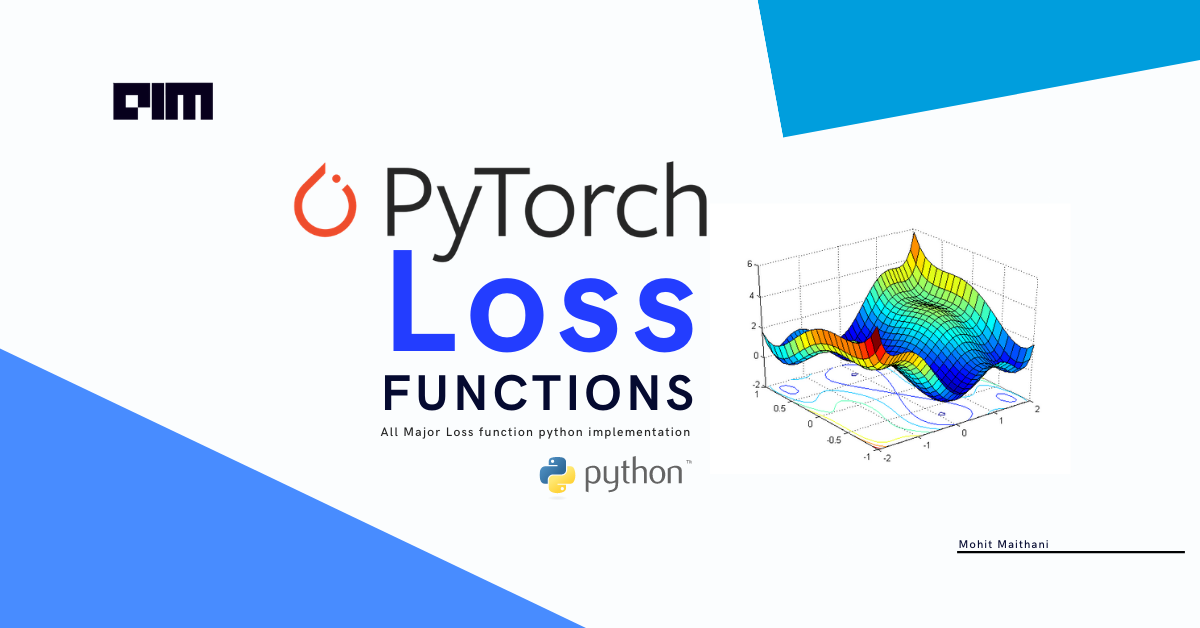

##  Mean Absolute Error (L1 Loss)


### Algorthmic way of find loss
### without pytorch module 

In [9]:
import numpy as np
y_pred = np.array([0.000, 0.100, 0.200])
y_true = np.array([0.000, 0.200, 0.250])
# Defining Mean Absolute Error loss function
def mae(pred, true):
    # Find absolute difference
    differences = pred - true
    absolute_differences = np.absolute(differences)
    # find the absoute mean
    mean_absolute_error = absolute_differences.mean()
    return mean_absolute_error
mae_value = mae(y_pred, y_true)
print ("MAE error is: " + str(mae_value))

MAE error is: 0.049999999999999996


### with pytirch module

In [10]:
mae_loss = nn.L1Loss()

In [11]:
import torch
mae_loss = torch.nn.L1Loss()
input = torch.tensor(y_pred)
target = torch.tensor(y_true)
output = mae_loss(input, target)
print(output)

tensor(0.0500, dtype=torch.float64)


##  Mean-Squared Error (L2 Loss)
*italicized text*

In [12]:
input = torch.randn(3, 4, requires_grad=True)
target = torch.randn(3, 4)

mse_loss = nn.MSELoss()

output = mse_loss(input, target)
output.backward()

print('input -: ', input)
print('target -: ', target)
print('output -: ', output)

input -:  tensor([[-0.8130, -0.1722,  2.1259,  0.9007],
        [ 0.4301,  0.2543, -0.3947, -1.8088],
        [ 0.0463,  1.6871, -0.4065, -0.5540]], requires_grad=True)
target -:  tensor([[ 0.9704, -0.1731,  0.0868,  0.8792],
        [-0.6950, -1.9831, -0.0518, -0.1137],
        [ 0.5052,  0.6071,  1.5943, -0.8278]])
output -:  tensor(1.8380, grad_fn=<MseLossBackward>)


##  Binary Cross Entropy


### algorithm

In [13]:
import numpy as np
y_pred = np.array([0.1580, 0.4137, 0.2285])
y_true = np.array([0.0, 1.0, 0.0]) #2 labels: (0,1)
def BCE(y_pred, y_true):
    total_bce_loss = np.sum(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))
    # Getting the mean BCE loss
    num_of_samples = y_pred.shape[0]
    mean_bce_loss = total_bce_loss / num_of_samples
    
    return mean_bce_loss

bce_value = BCE(y_pred, y_true)
print ("BCE error is: " + str(bce_value))

BCE error is: 0.43800269247783435


### pytorch implemenation

In [14]:
bce_loss = torch.nn.BCELoss()
sigmoid = torch.nn.Sigmoid() # Ensuring inputs are between 0 and 1
input = torch.tensor(y_pred)
target = torch.tensor(y_true)
output = bce_loss(input, target)
output

tensor(0.4380, dtype=torch.float64)

## BCEWithLogitsLoss(nn.BCEWithLogitsLoss)


In [15]:
import torch
target = torch.ones([10, 64], dtype=torch.float32)  # 64 classes, batch size = 10
output = torch.full([10, 64], 1.5)  # A prediction (logit)
pos_weight = torch.ones([64])  # All weights are equal to 1
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
criterion(output, target)  # -log(sigmoid(1.5))

tensor(0.2014)

## Negative Log-Likelihood Loss


In [16]:
input = torch.randn(3, 5, requires_grad=True)
# every element in target should have value(0 <= value < C)
target = torch.tensor([1, 0, 4])

m = nn.LogSoftmax(dim=1)
nll_loss = nn.NLLLoss()
output = nll_loss(m(input), target)
output.backward()

print('input -: ', input)
print('target -: ', target)
print('output -: ', output)

input -:  tensor([[ 0.2100, -0.2934, -0.2368, -0.9120, -0.8677],
        [ 0.1300, -0.4204,  0.5999,  0.2263, -0.0318],
        [ 1.0562, -0.6507, -2.2783,  0.2079,  0.2805]], requires_grad=True)
target -:  tensor([1, 0, 4])
output -:  tensor(1.5756, grad_fn=<NllLossBackward>)


## PoissonNLLLoss

In [17]:
import torch.nn as nn
loss = nn.PoissonNLLLoss()
log_input = torch.randn(5, 2, requires_grad=True)
target = torch.randn(5, 2)
output = loss(log_input, target)
output.backward()
output

tensor(1.0439, grad_fn=<MeanBackward0>)

##Cross-Entropy Loss
 

In [18]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)

cross_entropy_loss = nn.CrossEntropyLoss()
output = cross_entropy_loss(input, target)
output.backward()

print('input: ', input)
print('target: ', target)
print('output: ', output)

input:  tensor([[-0.5641,  2.0046,  0.4709, -1.3824,  0.3271],
        [ 0.2807, -0.8588, -0.6625,  1.1710, -1.1822],
        [-0.3820,  0.2075,  0.6264, -0.5623, -0.6328]], requires_grad=True)
target:  tensor([3, 2, 3])
output:  tensor(2.7897, grad_fn=<NllLossBackward>)


## Hinge Embedding Loss


In [19]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)

hinge_loss = nn.HingeEmbeddingLoss()
output = hinge_loss(input, target)
output.backward()

print('input -: ', input)
print('target -: ', target)
print('output -: ', output)

input -:  tensor([[-1.3021,  0.1646, -0.6010,  1.1430,  0.0962],
        [ 0.2079,  1.8048, -0.9333,  1.1201, -1.1432],
        [ 0.1606, -0.0297,  0.6047,  0.1355,  0.5362]], requires_grad=True)
target -:  tensor([[-1.5627, -1.5915,  0.5986,  0.4758, -1.1109],
        [-1.9742,  1.1048, -0.5299, -0.0454,  0.2371],
        [-0.0415, -0.3526,  0.9375,  0.6387,  0.6531]])
output -:  tensor(1.0712, grad_fn=<MeanBackward0>)


##Margin Ranking Loss


```
torch.nn.MarginRankingLoss
```



In [20]:
first_input = torch.randn(3, requires_grad=True)
Second_input = torch.randn(3, requires_grad=True)
target = torch.randn(3).sign()

ranking_loss = nn.MarginRankingLoss()
output = ranking_loss(first_input, Second_input, target)
output.backward()

print('input one: ', first_input)
print('input two: ', Second_input)
print('target: ', target)
print('output: ', output)

input one:  tensor([ 0.0219, -0.7005, -1.2160], requires_grad=True)
input two:  tensor([-0.4255,  0.3859, -0.7394], requires_grad=True)
target:  tensor([-1., -1.,  1.])
output:  tensor(0.3080, grad_fn=<MeanBackward0>)


## Triplet Margin Loss Function

In [21]:
anchor = torch.randn(100, 128, requires_grad=True)
positive = torch.randn(100, 128, requires_grad=True)
negative = torch.randn(100, 128, requires_grad=True)

triplet_margin_loss = nn.TripletMarginLoss(margin=1.0, p=2)
output = triplet_margin_loss(anchor, positive, negative)
output.backward()

print('anchors -: ', anchor)
print('positive -: ', positive)
print('negative -: ', negative)
print('output -: ', output)

anchors -:  tensor([[-0.0458, -0.2617,  0.8472,  ...,  1.7588, -1.3604,  0.7182],
        [ 1.2925,  1.7845, -1.0670,  ..., -0.4664, -0.6562, -0.5562],
        [-0.4970, -0.5046, -1.8275,  ..., -1.7325, -0.0448,  0.2471],
        ...,
        [ 0.5414,  0.1786,  0.8064,  ..., -0.6623, -0.2556, -0.2867],
        [-1.1563, -1.7103,  2.2845,  ...,  1.0123, -0.3839, -1.3699],
        [ 0.7297, -0.1043, -0.1768,  ...,  0.3457, -0.8843, -0.0626]],
       requires_grad=True)
positive -:  tensor([[ 7.4869e-01,  1.3499e+00, -1.4480e+00,  ..., -7.6688e-01,
         -1.7461e-03, -7.0950e-01],
        [-1.0364e+00,  1.0784e+00,  1.4848e+00,  ..., -6.4932e-01,
         -2.4223e-01,  4.4354e-01],
        [ 1.9670e-01, -8.3027e-01,  2.5105e-01,  ..., -9.0814e-01,
         -2.3587e-01,  1.3626e+00],
        ...,
        [-2.3753e+00, -1.0636e+00,  3.1268e+00,  ...,  1.5887e-01,
          6.0285e-02,  3.2817e-01],
        [ 1.0319e+00, -9.9035e-01, -9.8707e-01,  ...,  1.2975e+00,
          6.1644e-01, 

##Kullback-Leibler divergence


In [22]:
input = torch.randn(2, 3, requires_grad=True)
target = torch.randn(2, 3)

kld_loss = nn.KLDivLoss(reduction = 'batchmean')
output = kld_loss(input, target)
output.backward()

print('input tensor: ', input)
print('target tensor: ', target)
print('Loss: ', output)

input tensor:  tensor([[-0.8168,  1.6042, -0.7599],
        [-0.6457,  0.3002, -0.7881]], requires_grad=True)
target tensor:  tensor([[ 1.1857,  0.6820, -0.5791],
        [-0.3623, -0.7202, -0.0946]])
Loss:  tensor(-0.0923, grad_fn=<DivBackward0>)
